In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

In [2]:
demo = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_01_DEMO.csv")
demo_1 = pd.read_csv("E:/Kaggle_Practice/LotteMembers/demo_1.csv")
pdde = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_02_PDDE.csv")
copu = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_03_COP_U.csv")
pdclac = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_04_PD_CLAC.csv")
br = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_05_BR.csv")
lpay = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_06_LPAY.csv")
pdde_copu = pd.read_csv("E:/Kaggle_Practice/LotteMembers/pdde_copu.csv")
lpay_pdde = pd.read_csv("E:/Kaggle_Practice/LotteMembers/pdde_lpay.csv")
cust_top25 = pd.read_csv("E:/Kaggle_Practice/LotteMembers/cust_top25.csv")

### 궁금증 1. 제휴사 & 엘페이 이용 고객이 상품 구매도 많이 할까?

In [3]:
pd.set_option('display.float_format','{:,.2f}'.format)
pdde_copu.describe()

,Unnamed: 0,chnl_dv,de_dt,de_hr,buy_am,buy_ct
count,"3,558,050.00","3,558,050.00","3,558,050.00","3,558,050.00","3,558,050.00","3,558,050.00"
mean,"1,779,024.50",1.11,"20,210,633.84",15.73,"24,385.87",1.30
std,"1,027,120.71",0.31,341.52,3.78,"239,208.78",1.53
min,0.00,1.00,"20,210,101.00",0.00,1.00,1.00
25%,"889,512.25",1.00,"20,210,324.00",13.00,"2,000.00",1.00
50%,"1,779,024.50",1.00,"20,210,616.00",16.00,"4,000.00",1.00
75%,"2,668,536.75",1.00,"20,210,917.00",19.00,"9,600.00",1.00
max,"3,558,049.00",2.00,"20,211,231.00",23.00,"64,000,000.00",100.00


In [4]:
pd.set_option('display.float_format','{:,.2f}'.format)
pdde_not_copu.describe()

,chnl_dv,de_dt,de_hr,buy_am,buy_ct
count,"823,693.00","823,693.00","823,693.00","823,693.00","823,693.00"
mean,1.06,"20,210,635.19",15.64,"18,144.17",1.35
std,0.23,339.74,3.48,"183,680.38",1.84
min,1.00,"20,210,101.00",0.00,1.00,1.00
25%,1.00,"20,210,324.00",13.00,"2,100.00",1.00
50%,1.00,"20,210,618.00",16.00,"3,990.00",1.00
75%,1.00,"20,210,915.00",18.00,"8,700.00",1.00
max,2.00,"20,211,231.00",23.00,"55,680,000.00",100.00


#### 제휴사를 이용하는 고객들의 구매 평균 금액이 확실이 제휴사 이용 안하는 고객보다 높다.

In [5]:
pd.set_option('display.float_format','{:,.2f}'.format)
pdde_lpay.describe()

,chnl_dv,de_dt,de_hr,buy_am,buy_ct
count,"2,018,468.00","2,018,468.00","2,018,468.00","2,018,468.00","2,018,468.00"
mean,1.18,"20,210,619.76",15.59,"27,699.32",1.30
std,0.38,342.11,4.06,"263,679.81",1.57
min,1.00,"20,210,101.00",0.00,1.00,1.00
25%,1.00,"20,210,319.00",13.00,"2,000.00",1.00
50%,1.00,"20,210,606.00",16.00,"4,000.00",1.00
75%,1.00,"20,210,912.00",19.00,"9,900.00",1.00
max,2.00,"20,211,231.00",23.00,"55,090,000.00",100.00


In [6]:
pd.set_option('display.float_format','{:,.2f}'.format)
pdde_not_lpay.describe()

,chnl_dv,de_dt,de_hr,buy_am,buy_ct
count,"2,363,275.00","2,363,275.00","2,363,275.00","2,363,275.00","2,363,275.00"
mean,1.03,"20,210,646.33",15.81,"19,380.38",1.32
std,0.17,339.91,3.40,"196,226.35",1.61
min,1.00,"20,210,101.00",0.00,1.00,1.00
25%,1.00,"20,210,328.00",13.00,"2,000.00",1.00
50%,1.00,"20,210,622.00",16.00,"3,990.00",1.00
75%,1.00,"20,210,919.00",18.00,"8,980.00",1.00
max,2.00,"20,211,231.00",23.00,"64,000,000.00",100.00


#### 엘페이를 이용하는 고객들의 구매 평균 금액이 확실이 엘페이 이용 안하는 고객보다 높다.

### 궁금증 2. 고객이 구매한 상품끼리 상관관계가 있을까? (상품대분류 'clac_hlv_nm' 컬럼 사용)

In [7]:
pdclac.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [8]:
# 상품구매정보(pdde)와 상품분류정보(pdclac) 합치기

result = pd.merge(pdde, pdclac, on="pd_c", how="left")
result.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,"15,000.00",1,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,"79,700.00",1,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,남성티셔츠,남성의류,남성의류상의


In [9]:
# 상품대분류 컬럼 원핫인코딩 하기

result_clac_hlv_nm = pd.get_dummies(result, columns = ['clac_hlv_nm'])
result_clac_hlv_nm

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,clac_hlv_nm_축산물,clac_hlv_nm_출산/육아용품,clac_hlv_nm_침구/수예,clac_hlv_nm_커피/차,clac_hlv_nm_컴퓨터,clac_hlv_nm_테넌트/음식점,clac_hlv_nm_패션잡화,clac_hlv_nm_퍼스널케어,clac_hlv_nm_헬스/피트니스,clac_hlv_nm_화장품/뷰티케어
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,"15,000.00",1,...,0,0,0,0,0,0,0,0,0,0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,"79,700.00",1,...,0,0,0,0,0,0,0,0,0,0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,...,0,0,0,0,0,0,0,0,0,0
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,...,0,0,0,0,0,0,0,0,0,0
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1,...,0,0,0,0,0,0,0,0,0,0
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1,...,0,0,0,0,0,0,0,0,0,0
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1,...,0,0,0,0,0,0,0,0,0,0
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,"50,000.00",1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
result_clac_hlv_nm.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_mcls_nm', 'clac_hlv_nm_가구',
       'clac_hlv_nm_건강식품', 'clac_hlv_nm_건강용품', 'clac_hlv_nm_건해산물',
       'clac_hlv_nm_계절가전', 'clac_hlv_nm_공구/안전용품', 'clac_hlv_nm_과일',
       'clac_hlv_nm_과자', 'clac_hlv_nm_구기/필드스포츠', 'clac_hlv_nm_금융/보험서비스',
       'clac_hlv_nm_기타(비상품)', 'clac_hlv_nm_기타상품', 'clac_hlv_nm_남성의류',
       'clac_hlv_nm_냉동식품', 'clac_hlv_nm_냉장/세탁가전', 'clac_hlv_nm_냉장식품',
       'clac_hlv_nm_담배', 'clac_hlv_nm_대용식', 'clac_hlv_nm_모바일',
       'clac_hlv_nm_문구/사무용품', 'clac_hlv_nm_병통조림', 'clac_hlv_nm_상품권',
       'clac_hlv_nm_생활/렌탈서비스', 'clac_hlv_nm_생활/주방가전', 'clac_hlv_nm_서적/음반/악기',
       'clac_hlv_nm_세제/위생', 'clac_hlv_nm_속옷/양말/홈웨어', 'clac_hlv_nm_수산물',
       'clac_hlv_nm_스포츠패션', 'clac_hlv_nm_시즌스포츠', 'clac_hlv_nm_식기/조리기구',
       'clac_hlv_nm_아웃도어/레저', 'clac_hlv_nm_양곡', 'clac_hlv_nm_여성의류',
       'clac_hlv_nm_여행/레저서비스', 'clac_hlv_nm_영상/음향가전', 'clac_hlv_nm_완구',
       'c

In [21]:
corr['clac_hlv_nm_조리식품'].sort_values(ascending = False)

clac_hlv_nm_조리식품        1.00
de_dt                   0.01
clac_hlv_nm_금융/보험서비스   -0.00
clac_hlv_nm_기타상품       -0.00
clac_hlv_nm_계절가전       -0.00
                        ... 
clac_hlv_nm_냉장식품       -0.04
clac_hlv_nm_유제품        -0.04
clac_hlv_nm_대용식        -0.04
clac_hlv_nm_채소         -0.05
clac_hlv_nm_과자         -0.05
Name: clac_hlv_nm_조리식품, Length: 65, dtype: float64

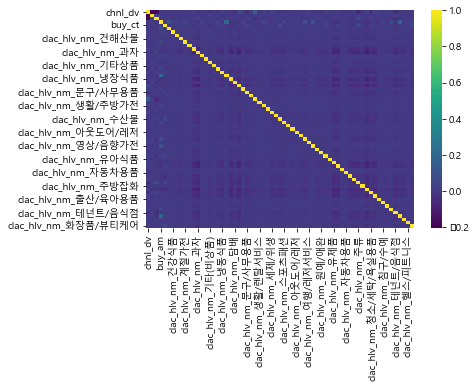

In [22]:
# 한글 폰트 사용을 위해서 세팅
font_path = "C:/Users/katenam/AppData/Local/Microsoft/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


corr = result_clac_hlv_nm.corr()
sns.heatmap(corr, cmap='viridis')
plt.show()

#### 구매한 상품끼리 상관관계 없는것으로 확인

### 궁금증 3. 구매한 상품과 점포간의 상관관계가 있을까?

In [23]:
br.head()

,br_c,cop_c,zon_hlv,zon_mcls
0,A010001,A01,Z17,Z17024
1,A010002,A01,Z17,Z17018
2,A010003,A01,Z17,Z17011
3,A010004,A01,Z16,Z16007
4,A010005,A01,Z17,Z17005


In [29]:
resultss = pd.merge(result_clac_hlv_nm, demo, on="cust", how="left")
resultss.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,...,clac_hlv_nm_커피/차,clac_hlv_nm_컴퓨터,clac_hlv_nm_테넌트/음식점,clac_hlv_nm_패션잡화,clac_hlv_nm_퍼스널케어,clac_hlv_nm_헬스/피트니스,clac_hlv_nm_화장품/뷰티케어,ma_fem_dv,ages,zon_hlv
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,"15,000.00",1,...,0,0,0,0,0,0,0,여성,50대,Z17
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,"79,700.00",1,...,0,0,0,0,0,0,0,여성,40대,Z13
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,...,0,0,0,0,0,0,0,여성,50대,Z17
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,...,0,0,0,0,0,0,0,여성,50대,Z17
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,"19,000.00",1,...,0,0,0,0,0,0,0,여성,50대,Z17


In [30]:
resultss_zon_hlv = pd.get_dummies(resultss, columns = ['zon_hlv'])
resultss_zon_hlv.corr()

,chnl_dv,de_dt,de_hr,buy_am,buy_ct,clac_hlv_nm_가구,clac_hlv_nm_건강식품,clac_hlv_nm_건강용품,clac_hlv_nm_건해산물,clac_hlv_nm_계절가전,...,zon_hlv_Z08,zon_hlv_Z09,zon_hlv_Z10,zon_hlv_Z11,zon_hlv_Z12,zon_hlv_Z13,zon_hlv_Z14,zon_hlv_Z15,zon_hlv_Z16,zon_hlv_Z17
chnl_dv,1.00,-0.20,-0.18,-0.01,-0.00,0.01,0.01,0.01,0.01,0.00,...,-0.01,-0.02,-0.01,-0.03,-0.01,-0.00,-0.00,0.00,-0.00,0.05
de_dt,-0.20,1.00,0.02,0.01,0.00,-0.00,-0.01,-0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,-0.00,0.01,0.00,0.00,-0.00
de_hr,-0.18,0.02,1.00,-0.01,-0.00,-0.00,-0.01,-0.00,0.00,-0.00,...,-0.00,0.00,-0.01,0.00,0.00,0.00,-0.01,0.00,0.00,0.00
buy_am,-0.01,0.01,-0.01,1.00,0.01,0.09,0.01,0.01,-0.01,0.05,...,-0.01,-0.01,-0.00,-0.00,0.00,-0.00,0.00,-0.01,0.02,0.01
buy_ct,-0.00,0.00,-0.00,0.01,1.00,0.00,0.01,0.01,-0.00,-0.00,...,0.01,0.01,-0.00,0.01,0.00,0.00,-0.00,0.01,-0.01,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zon_hlv_Z13,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,...,-0.03,-0.03,-0.11,-0.05,-0.02,1.00,-0.03,-0.03,-0.05,-0.12
zon_hlv_Z14,-0.00,0.01,-0.01,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.02,-0.02,-0.09,-0.04,-0.02,-0.03,1.00,-0.02,-0.04,-0.09
zon_hlv_Z15,0.00,0.00,0.00,-0.01,0.01,0.00,-0.00,-0.00,-0.00,0.00,...,-0.02,-0.02,-0.09,-0.04,-0.02,-0.03,-0.02,1.00,-0.04,-0.09
zon_hlv_Z16,-0.00,0.00,0.00,0.02,-0.01,0.00,0.00,-0.00,-0.00,-0.00,...,-0.05,-0.04,-0.18,-0.08,-0.04,-0.05,-0.04,-0.04,1.00,-0.19


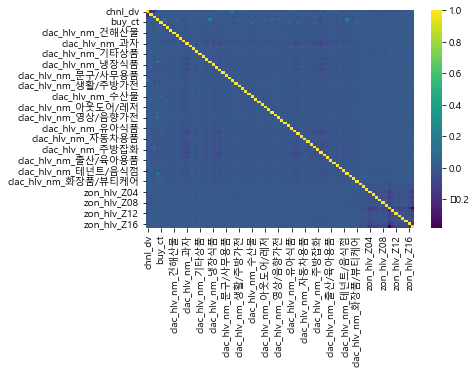

In [31]:
# 한글 폰트 사용을 위해서 세팅
font_path = "C:/Users/katenam/AppData/Local/Microsoft/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


corr = resultss_zon_hlv.corr()
sns.heatmap(corr, cmap='viridis')
plt.show()

In [32]:
resultss_zon_hlv.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct', 'pd_nm', 'clac_mcls_nm', 'clac_hlv_nm_가구',
       'clac_hlv_nm_건강식품', 'clac_hlv_nm_건강용품', 'clac_hlv_nm_건해산물',
       'clac_hlv_nm_계절가전', 'clac_hlv_nm_공구/안전용품', 'clac_hlv_nm_과일',
       'clac_hlv_nm_과자', 'clac_hlv_nm_구기/필드스포츠', 'clac_hlv_nm_금융/보험서비스',
       'clac_hlv_nm_기타(비상품)', 'clac_hlv_nm_기타상품', 'clac_hlv_nm_남성의류',
       'clac_hlv_nm_냉동식품', 'clac_hlv_nm_냉장/세탁가전', 'clac_hlv_nm_냉장식품',
       'clac_hlv_nm_담배', 'clac_hlv_nm_대용식', 'clac_hlv_nm_모바일',
       'clac_hlv_nm_문구/사무용품', 'clac_hlv_nm_병통조림', 'clac_hlv_nm_상품권',
       'clac_hlv_nm_생활/렌탈서비스', 'clac_hlv_nm_생활/주방가전', 'clac_hlv_nm_서적/음반/악기',
       'clac_hlv_nm_세제/위생', 'clac_hlv_nm_속옷/양말/홈웨어', 'clac_hlv_nm_수산물',
       'clac_hlv_nm_스포츠패션', 'clac_hlv_nm_시즌스포츠', 'clac_hlv_nm_식기/조리기구',
       'clac_hlv_nm_아웃도어/레저', 'clac_hlv_nm_양곡', 'clac_hlv_nm_여성의류',
       'clac_hlv_nm_여행/레저서비스', 'clac_hlv_nm_영상/음향가전', 'clac_hlv_nm_완구',
       'c

In [79]:
corr['zon_hlv_Z01'].sort_values(ascending = False).head(10)

zon_hlv_Z01              1.00
clac_hlv_nm_주방잡화         0.01
clac_hlv_nm_청소/세탁/욕실용품   0.01
clac_hlv_nm_채소           0.01
clac_hlv_nm_수산물          0.01
buy_ct                   0.01
clac_hlv_nm_세제/위생        0.00
clac_hlv_nm_축산물          0.00
clac_hlv_nm_병통조림         0.00
clac_hlv_nm_퍼스널케어        0.00
Name: zon_hlv_Z01, dtype: float64

### 궁금증 4. 한번 주문할때 80개 이상 주문된 상품은 무엇인가? 

In [3]:
pd.set_option('display.float_format','{:,.2f}'.format)
pdde.describe()

,chnl_dv,de_dt,de_hr,buy_am,buy_ct
count,"4,381,743.00","4,381,743.00","4,381,743.00","4,381,743.00","4,381,743.00"
mean,1.10,"20,210,634.09",15.71,"23,212.54",1.31
std,0.30,341.18,3.72,"229,809.69",1.60
min,1.00,"20,210,101.00",0.00,1.00,1.00
25%,1.00,"20,210,324.00",13.00,"2,000.00",1.00
50%,1.00,"20,210,616.00",16.00,"4,000.00",1.00
75%,1.00,"20,210,917.00",18.00,"9,280.00",1.00
max,2.00,"20,211,231.00",23.00,"64,000,000.00",100.00


<AxesSubplot:xlabel='buy_ct'>

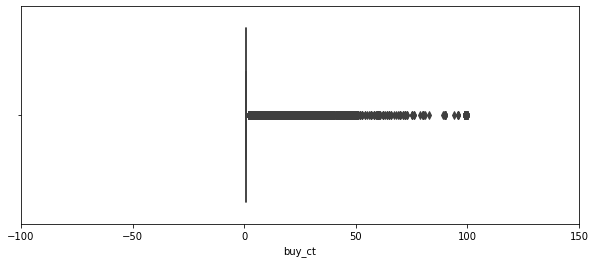

In [4]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 150)
sns.boxplot(x=pdde.buy_ct)

In [5]:
pdde[pdde['buy_ct'] > 80]

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
48054,M838622742,A01033672436,1,A01,A010018,PD1316,20210201,14,"1,050,000.00",100
56494,M203489906,A01039612397,1,A01,A010042,PD1644,20210206,16,"135,000.00",90
90853,M282697479,A01064770920,1,A01,A010037,PD1181,20210225,14,"300,000.00",100
189324,M282697479,A01135093413,1,A01,A010037,PD1181,20210415,13,"300,000.00",100
278797,M552638745,A01198738497,1,A01,A010046,PD1885,20210528,14,"11,205,000.00",83
...,...,...,...,...,...,...,...,...,...,...
4338540,M490324209,E06023069697,2,A06,NaN,PD0500,20210330,12,"282,240.00",96
4341607,M190157744,E06025098193,2,A06,NaN,PD1064,20210405,21,"120,000.00",96
4374795,M927998831,E06047735952,2,A06,NaN,PD1831,20211013,12,"790,000.00",100
4376390,M906226236,E06048834572,2,A06,NaN,PD1853,20211022,16,"370,000.00",100


In [14]:
buy80 = pdde[pdde['buy_ct'] > 80]['pd_c']


In [7]:
pdclac

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [12]:
%%time

for i in buy80:
    print(pdclac[pdclac['pd_c'] == i]['pd_nm'])


1315    식용유세트
Name: pd_nm, dtype: object
1643    티백/드립원두커피
Name: pd_nm, dtype: object
1180    커피음료
Name: pd_nm, dtype: object
1884    남성용스킨케어류
Name: pd_nm, dtype: object
1927    스킨케어세트
Name: pd_nm, dtype: object
1918    스킨/토너
Name: pd_nm, dtype: object
948    여성티셔츠/탑
Name: pd_nm, dtype: object
1330    수입맥주
Name: pd_nm, dtype: object
1483    종량제봉투
Name: pd_nm, dtype: object
1172    생수
Name: pd_nm, dtype: object
4    기타가구
Name: pd_nm, dtype: object
496    통조림혼합세트
Name: pd_nm, dtype: object
1866    헤어케어선물세트
Name: pd_nm, dtype: object
776    남성런닝/트레이닝화
Name: pd_nm, dtype: object
402    국물봉지라면
Name: pd_nm, dtype: object
1846    생리대
Name: pd_nm, dtype: object
395    즉석컵밥
Name: pd_nm, dtype: object
227    감자스낵
Name: pd_nm, dtype: object
1151    가공우유
Name: pd_nm, dtype: object
379    수입담배
Name: pd_nm, dtype: object
497    참치통조림
Name: pd_nm, dtype: object
499    꽁치고등어통조림
Name: pd_nm, dtype: object
1063    애견사료
Name: pd_nm, dtype: object
1830    칫솔
Name: pd_nm, dtype: object
1852    핸드워시/손세정제
Na

In [15]:
pdde[pdde['buy_ct'] > 80]['pd_c'].value_counts()

PD1152    35
PD1181     5
PD1919     3
PD0497     3
PD1484     2
PD0396     2
PD1316     1
PD1847     1
PD1853     1
PD1831     1
PD1064     1
PD0500     1
PD0498     1
PD0380     1
PD0228     1
PD0777     1
PD0403     1
PD1644     1
PD1867     1
PD0005     1
PD1173     1
PD1331     1
PD0949     1
PD1928     1
PD1885     1
PD1717     1
Name: pd_c, dtype: int64

### 궁금증 5. 1회 주문 금액이 천만원이상인 고객의 구매 상품은? 

<AxesSubplot:xlabel='buy_am'>

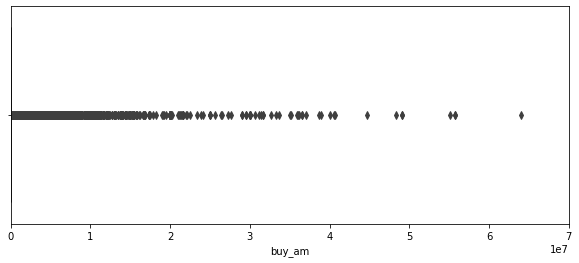

In [22]:
plt.figure(figsize=(10,4))
plt.xlim(0, 70000000)
sns.boxplot(x=pdde.buy_am)

In [23]:
pdde[pdde['buy_am'] > 10000000]

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
770,M075995202,A01000537839,1,A01,A010041,PD1827,20210102,12,"10,930,000.00",1
7774,M614715086,A01005424219,1,A01,A010006,PD0001,20210106,15,"11,160,000.00",1
8214,M114776302,A01005726303,1,A01,A010002,PD1752,20210106,18,"12,030,000.00",1
10452,M397220613,A01007337841,1,A01,A010034,PD0989,20210108,17,"10,310,000.00",1
11134,M890231252,A01007800924,1,A01,A010041,PD1750,20210109,12,"10,400,000.00",1
...,...,...,...,...,...,...,...,...,...,...
691319,M669977400,A01496262010,1,A01,A010001,PD1752,20211226,19,"15,350,000.00",1
693989,M939511937,A01498216042,1,A01,A010041,PD0298,20211228,16,"15,000,000.00",1
694074,M089914432,A01498285229,1,A01,A010001,PD1750,20211228,17,"12,000,000.00",1
695161,M770529808,A01499089912,1,A01,A010041,PD1739,20211229,14,"10,100,000.00",1


In [25]:
%%time

buy_am1000 = pdde[pdde['buy_am'] > 10000000]['pd_c'].unique()


for i in buy_am1000:
    print(pdclac[pdclac['pd_c'] == i]['pd_nm'])

1826    기타패션잡화
Name: pd_nm, dtype: object
0    소파
Name: pd_nm, dtype: object
1751    남성시계
Name: pd_nm, dtype: object
988    UHD
Name: pd_nm, dtype: object
1749    기타보석류
Name: pd_nm, dtype: object
963    기타여성의류아우터
Name: pd_nm, dtype: object
1918    스킨/토너
Name: pd_nm, dtype: object
1738    반지
Name: pd_nm, dtype: object
1762    여성숄더백
Name: pd_nm, dtype: object
976    여성기타모피의류
Name: pd_nm, dtype: object
987    LED
Name: pd_nm, dtype: object
63    안마의자
Name: pd_nm, dtype: object
336    양문형냉장고
Name: pd_nm, dtype: object
1750    여성시계
Name: pd_nm, dtype: object
957    여성코트
Name: pd_nm, dtype: object
964    여성원피스
Name: pd_nm, dtype: object
1768    여성가방액세서리
Name: pd_nm, dtype: object
1739    목걸이
Name: pd_nm, dtype: object
1742    팔찌
Name: pd_nm, dtype: object
764    남성골프바지
Name: pd_nm, dtype: object
1923    크림/밤/오일
Name: pd_nm, dtype: object
560    기타주방가전
Name: pd_nm, dtype: object
344    드럼세탁기
Name: pd_nm, dtype: object
4    기타가구
Name: pd_nm, dtype: object
340    기타냉장고
Name: pd_nm, dtype: objec

In [30]:
pdde[pdde['buy_am'] > 50000000]

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
38739,M750310186,A01027046780,1,A01,A010001,PD1752,20210126,16,"64,000,000.00",1
380865,M288629527,A01271693329,1,A01,A010004,PD1751,20210718,12,"55,680,000.00",1
386203,M288629527,A01275514864,1,A01,A010004,PD1751,20210721,14,"55,680,000.00",1
672820,M621699711,A01482823454,1,A01,A010041,PD1827,20211218,17,"55,090,000.00",1


In [32]:
pdclac[pdclac['pd_c'] == 'PD1827']

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
1826,PD1827,기타패션잡화,패션잡화,패션액세서리


### 궁금증 6. 주문 총 금액이 높은 고객, 자주 쇼핑한 고객이 다 동일 인물일까?

#### 주문 총 금액이 높은 고객은?

In [40]:
demo_1.sort_values(by="spent", ascending=False).head(20)

,cust,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq
10353,M343264688,남성,40대,Z17,386581410.0,12.0,76.0,481.0
11565,M384121563,여성,40대,Z10,379269980.0,79.0,19.0,391.0
8062,M268374518,여성,30대,Z12,371016180.0,62.0,14.0,316.0
1676,M055769504,남성,30대,Z10,369650800.0,0.0,11.0,133.0
8693,M288629527,남성,60대,Z16,368955660.0,0.0,0.0,165.0
21782,M724764678,여성,40대,Z01,346606070.0,104.0,14.0,216.0
3488,M116720573,남성,40대,Z17,323801780.0,0.0,11.0,291.0
2270,M075995202,여성,40대,Z10,302327422.0,6.0,14.0,389.0
4478,M149580352,여성,40대,Z17,295963550.0,5.0,5.0,233.0
28200,M939511937,남성,40대,Z17,266121440.0,12.0,17.0,234.0


#### 자주 쇼핑한 고객은?

In [35]:
demo_1.sort_values(by="freq", ascending=False).head(20)


,cust,ma_fem_dv,ages,zon_hlv,spent,lpay_num,asso_num,freq
1722,M057015266,남성,40대,Z10,36077588.0,1183.0,5.0,12448.0
27604,M919374790,남성,50대,Z17,35695020.0,4.0,9.0,10049.0
8670,M287960590,여성,40대,Z17,20007052.0,44.0,15.0,2564.0
22962,M763326819,남성,40대,Z11,10931937.0,0.0,0.0,2524.0
3730,M124357021,남성,40대,Z08,9903750.0,331.0,2.0,2143.0
28069,M935231621,남성,40대,Z16,9191232.0,0.0,0.0,1998.0
25572,M851925709,여성,40대,Z16,8165350.0,107.0,0.0,1924.0
1688,M056145651,여성,50대,Z10,8905038.0,168.0,20.0,1890.0
1877,M062470149,여성,60대,Z17,13275250.0,0.0,0.0,1873.0
13405,M447821725,남성,40대,Z17,13202600.0,132.0,11.0,1861.0


### 주문 총 금액이 높은 top50 고객과 주문 횟수가 많은 top50 고객은 몇명이 겹칠까?

In [47]:
a = demo_1.sort_values(by="spent", ascending=False).head(50)
b = a['cust'].unique()

c = demo_1.sort_values(by="freq", ascending=False).head(50)
d = c['cust'].unique()

e = list(set(b).intersection(d))
e

[]

#### 주문 총 금액이 높은 50명과, 주문 횟수가 많은 50명은 겹치는 고객이 없다.
#### 그렇다면 주문 총 금액이 높은 고객이 loyal 고객일까 아님 주문 횟수가 많은 고객이 loyal 고객일까?

In [49]:
pdde['de_dt'] = pd.to_datetime(pdde['de_dt'], format='%Y%m%d')
pdde['payment_tm'] = pdde['de_dt'].dt.strftime("%Y-%m")

In [51]:
pdde['de_dt'].max()-pdde['de_dt'].min()

Timedelta('364 days 00:00:00')

In [61]:
f = pdde[pdde['cust']== 'M552638745']
g = f['de_dt'].max() - f['de_dt'].min()
g

Timedelta('352 days 00:00:00')

In [64]:
pdde[pdde['cust']== 'M552638745']['cop_c'].nunique()

3

In [62]:
f['de_dt'].max()

Timestamp('2021-12-25 00:00:00')

In [63]:
f['de_dt'].min()

Timestamp('2021-01-07 00:00:00')